In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [54]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print('Train Shape: {}, Train ID Range {} to {}'.format(train.shape,train.Id.min(),train.Id.max()))
print('Test Shape: {}, Test ID Range {} to {}'.format(test.shape,test.Id.min(),test.Id.max()))

Train Shape: (1460, 81), Train ID Range 1 to 1460
Test Shape: (1459, 80), Test ID Range 1461 to 2919


In [55]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
all_data=train.append(test,sort=False)
print(all_data.shape)

(2919, 81)


In [42]:
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [58]:
numerics=all_data.select_dtypes(exclude='object').columns
print(numerics)
print(len(numerics))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
38


In [59]:
skew_calcs=all_data[numerics].skew().sort_values()
skew_calcs=skew_calcs[skew_calcs>.75]
skew_calcs

TotRmsAbvGrd      0.758757
2ndFlrSF          0.862118
BsmtUnfSF         0.919824
TotalBsmtSF       1.162882
GrLivArea         1.270010
MSSubClass        1.376165
BsmtFinSF1        1.425722
1stFlrSF          1.470360
LotFrontage       1.503278
WoodDeckSF        1.843380
SalePrice         1.882876
OpenPorchSF       2.536417
MasVnrArea        2.602589
BsmtHalfBath      3.932018
ScreenPorch       3.948723
EnclosedPorch     4.005950
BsmtFinSF2        4.147456
KitchenAbvGr      4.304467
3SsnPorch        11.381914
LowQualFinSF     12.094977
LotArea          12.829025
PoolArea         16.907017
MiscVal          21.958480
dtype: float64

In [60]:
skew_feats=skew_calcs.index

<Figure size 432x288 with 0 Axes>

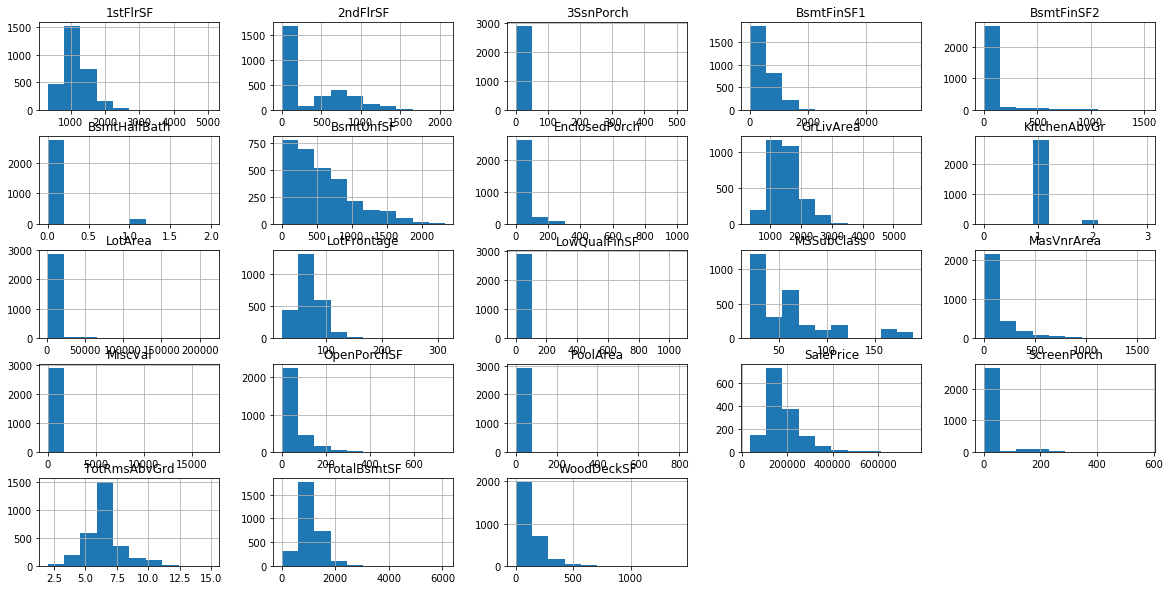

In [47]:
import matplotlib.pyplot as plt
plt.figure()
all_data[skew_feats].hist(figsize=(20,10))
plt.show()

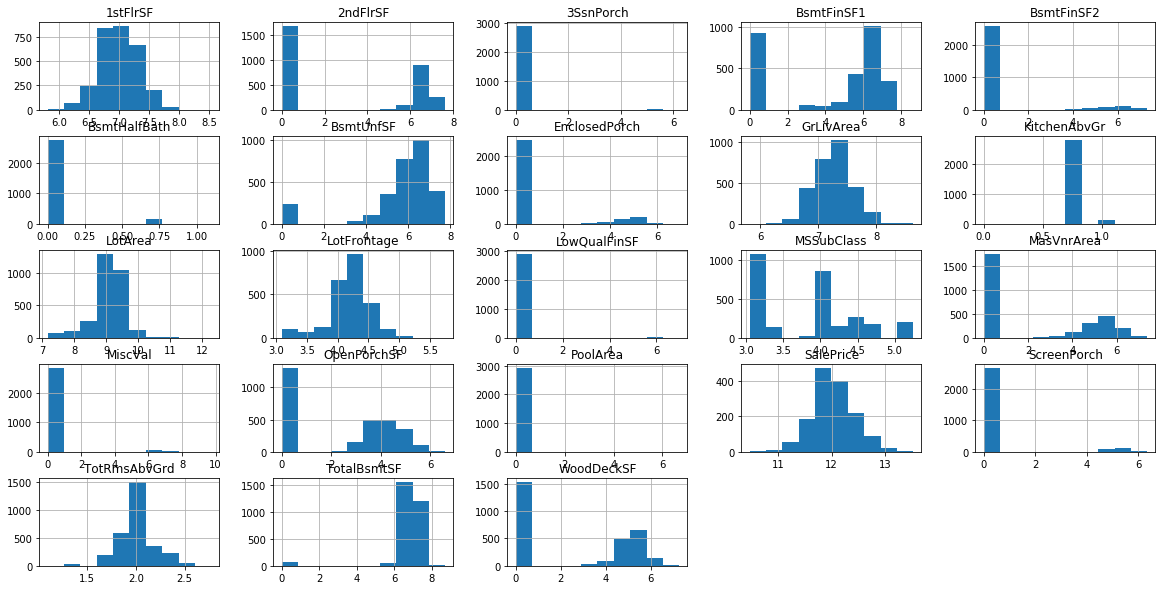

In [27]:
np.log1p(all_data[skew_feats]).hist(figsize=(20,10))
plt.show()

In [61]:
all_data[skew_feats]=np.log1p(all_data[skew_feats])

In [62]:
objects=train.select_dtypes(include='object').columns.tolist()

In [63]:
objects
train[objects].apply(lambda x:set(x))

MSZoning                                 {FV, RL, RM, C (all), RH}
Street                                                {Grvl, Pave}
Alley                                            {nan, Grvl, Pave}
LotShape                                      {IR2, Reg, IR3, IR1}
LandContour                                   {Lvl, Low, HLS, Bnk}
Utilities                                         {NoSeWa, AllPub}
LotConfig                      {CulDSac, FR2, Inside, Corner, FR3}
LandSlope                                          {Mod, Sev, Gtl}
Neighborhood     {NAmes, NoRidge, Veenker, SawyerW, OldTown, Sa...
Condition1       {Artery, PosN, PosA, Feedr, RRNe, RRNn, Norm, ...
Condition2       {Artery, PosN, PosA, Feedr, RRNn, Norm, RRAn, ...
BldgType                     {TwnhsE, 2fmCon, Twnhs, Duplex, 1Fam}
HouseStyle       {1Story, 1.5Unf, 2Story, SLvl, 2.5Unf, 1.5Fin,...
RoofStyle               {Hip, Flat, Shed, Gable, Gambrel, Mansard}
RoofMatl         {Tar&Grv, ClyTile, WdShake, CompShg, Membran,

In [64]:
all_data=pd.concat([all_data,pd.get_dummies(all_data[objects])],axis=1)
print(all_data.shape)
all_data=all_data.drop(objects,axis=1)
print(all_data.shape)

(2919, 333)
(2919, 290)


In [65]:
all_data=all_data.fillna(all_data.mean())

In [66]:
train_data=all_data[:1460]
test_data=all_data[1460:].drop('SalePrice',axis=1)

In [67]:
from sklearn.model_selection import train_test_split as split

In [69]:
X=train_data.drop(['SalePrice'],axis=1)
y=train_data['SalePrice']

X_train,X_test,y_train,y_test=split(X,y,test_size=.20,random_state=10)

In [70]:
def get_mse(model,alpha):
    run_model=model(alpha=alpha)
    run_model.fit(X_train,y_train)
    return mean_squared_error(y_pred=run_model.predict(X_test),y_true=y_test)

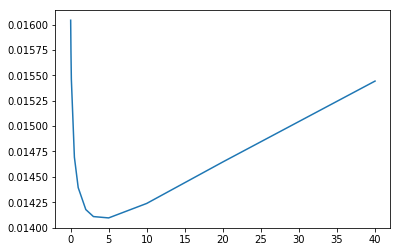

In [72]:
alphas=[.01,.05,.1,.5,1,2,3,5,10,20,40]
ridge_mses=[get_mse(Ridge,x) for x in alphas]
plt.plot(alphas,ridge_mses)

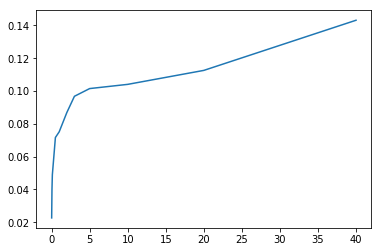

In [73]:
lasso_mses=[get_mse(Lasso,x) for x in alphas]
plt.plot(alphas,lasso_mses)

In [74]:
pd.DataFrame({'alpha':alphas,'MSE':ridge_mses}).sort_values('MSE',ascending=True)

,alpha,MSE
7,5.00,0.014096
6,3.00,0.014109
5,2.00,0.014178
8,10.00,0.014239
4,1.00,0.014394
9,20.00,0.014647
3,0.50,0.014694
10,40.00,0.015443
2,0.10,0.015462
1,0.05,0.015726


In [75]:
ridge_model=Ridge(alpha=5)
ridge_model.fit(X,y)
coefs=ridge_model.coef_

In [76]:
labels_and_weights=pd.DataFrame({'field':X.columns,'weight':coefs})

<BarContainer object of 18 artists>

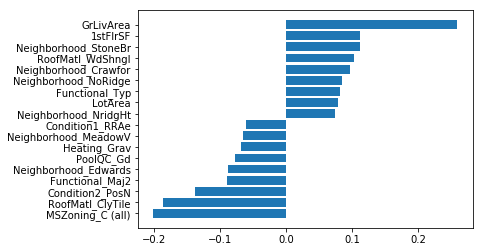

In [78]:
top_weights=labels_and_weights['weight'].quantile(.97)
bot_weights=labels_and_weights['weight'].quantile(.03)
heavy_weights=labels_and_weights[(labels_and_weights['weight']>top_weights) | (labels_and_weights['weight']<bot_weights)].sort_values('weight')
plt.barh(heavy_weights['field'],heavy_weights['weight'])

In [79]:
predictions=ridge_model.predict(test_data)

In [80]:
print(predictions.mean())

preds=np.expm1(predictions)
print(preds.mean())

11.996242783437358
175828.34369247494


In [81]:
sub=pd.DataFrame()
sub['Id']=test_data['Id']
sub['SalesPrice']=preds

In [82]:
sub.head()

,Id,SalesPrice
0,1461,118397.464280
1,1462,152985.747495
2,1463,181904.263791
3,1464,197085.031222
4,1465,200223.256825
